New York City Airbnb - 
Resolver :

What can we learn about different hosts and areas? -
Which hosts are the busiest and why? -
Is there any noticeable difference of traffic among different areas and what could be the reason for it?

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [30]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

Finding dimensions, shape, size of the dataframe 

In [5]:
#filas y columnas
df.shape

(48895, 16)

In [6]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [8]:
#Alugunos sets
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Observations:
El data set tiene : 
 - 48895 rows y 16 columnas
 - 10 var numericas y 6 categoricas (Dtype=object)
 - La var name tiene 48879 no nulos de 48895
 - La var host_name tiene 48874 no nulos de 48895
 - La var last_review tiene 38843 no nulos de 48895
 - La var reviews_per_month tiene 38843 no nulos de 48895


In [31]:
#prueba !
df_airbnb=df.copy()

In [11]:
#Valido los null del data set
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Un outlier es una observación anormal y extrema en una muestra estadística o serie temporal de datos que puede afectar potencialmente a la estimación de los parámetros del mismo.

In [38]:
#Data Preprocessing

#Reemplazo los valores null, por ej, reviews_per_month  tiene 10052, seteamos todos estos a 0
df['reviews_per_month'].fillna(0,inplace = True)

#name y host_name no son los aspectos principales de nuestro análisis, por eso los hemos reemplazado por algunos caracteres especiales.$y#
df['name'].fillna("$",inplace=True)
df['host_name'].fillna("#",inplace=True)

df.drop(['last_review'],axis=1,inplace=True)

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [12]:
#Barrios unicos : Brooklyn, Manhattan, Queens, Staten Islands, Bronx
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

Análisis univariado (Consiste en el análisis de cada una de las variables estudiadas por separado, es decir, el análisis está basado en una sola variable.)

La forma más común de realizar un análisis univariado es describir una variable utilizando estadísticas de resumen . Hay dos tipos populares de estadísticas resumidas: Medidas de tendencia central : estos números describen dónde se encuentra el centro de un conjunto de datos.

Diferentes grupos de vecinos
El gráfico representa el recuento de Airbnb en los diferentes grupos de vecinos.
Desde la gráfica, podemos visualizar fácilmente que el número máximo de casas o apartamentos listados en Airbnb está en Manhattan

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


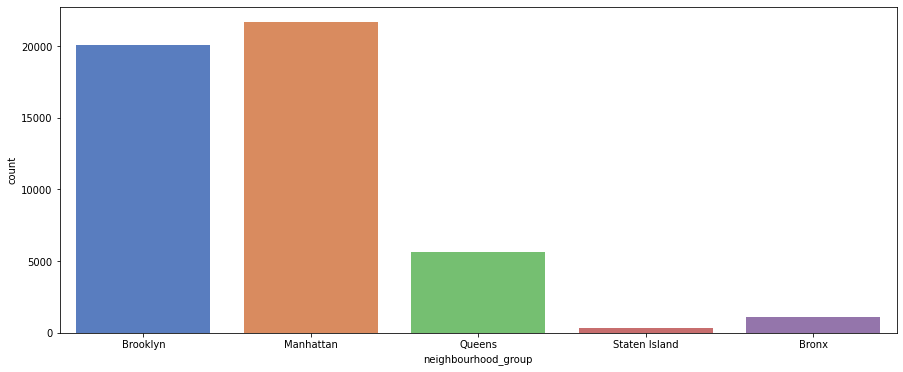

In [13]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.neighbourhood_group,palette="muted")
plt.show()

Distribución de precios Brooklyn
- La distribución de precios en Brooklyn promedia alrededor de 70-500 dólares por noche dependiendo del vecindario.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


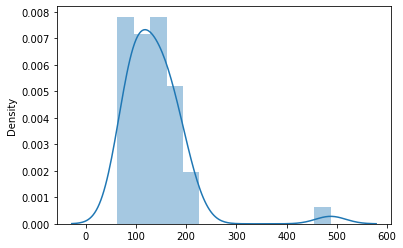

In [14]:
df1 = df[df.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


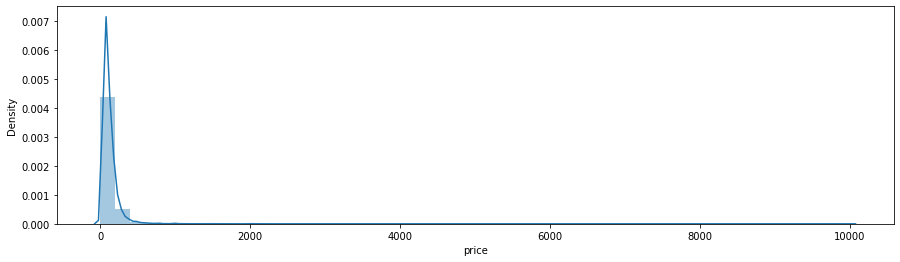

In [15]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Brooklyn"]['price']
sns.distplot(df1)
plt.show()

Distribución de precios en Manhattan
- La distribución de precios en Manhattan promedia alrededor de 80-490 dólares por noche dependiendo del vecindario.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


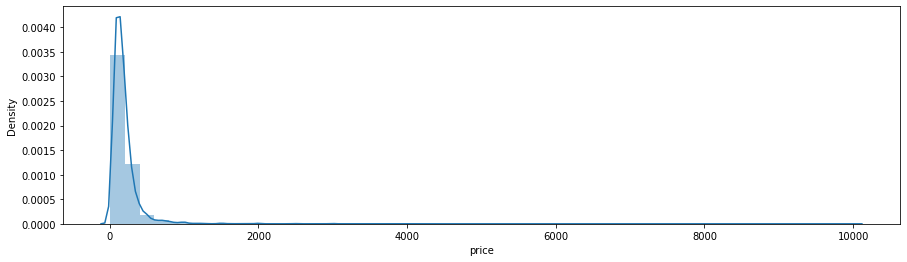

In [16]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Manhattan"]['price']
sns.distplot(df1)
plt.show()

Distribución de Precios en Queens
- La distribución de precios en Queens promedia alrededor de 60-300 dólares por noche dependiendo del vecindario.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


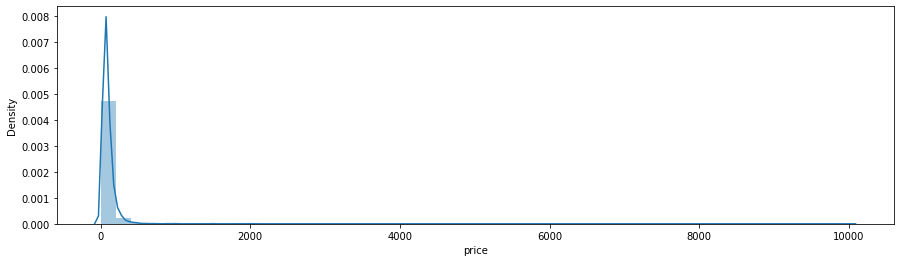

In [17]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Queens"]['price']
sns.distplot(df1)
plt.show()

Distribución de precios en Staten Island
- La distribución de precios en Staten Islands promedia alrededor de 50-800 dólares por noche dependiendo del vecindario.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


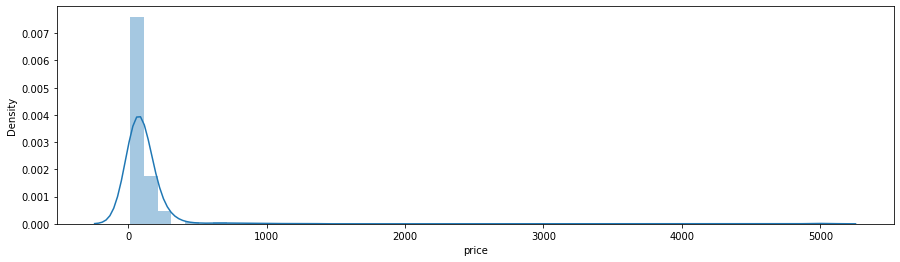

In [19]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Staten Island"]['price']
sns.distplot(df1)
plt.show()

Distribución de Precios en Bronx
- La distribución de precios en Bronx promedia alrededor de 50-450 dólares por noche dependiendo del vecindario.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


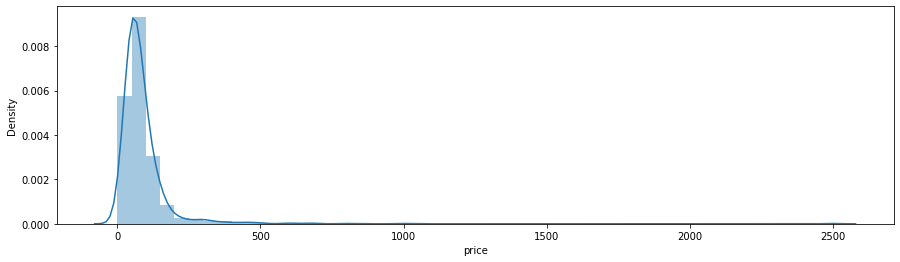

In [20]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Bronx"]['price']
sns.distplot(df1)
plt.show()

Cantidad de tipos de habitaciones
- La cantidad máxima de habitaciones son habitaciones privadas , casas y apartamentos completos. Hay una cantidad muy pequeña de habitaciones compartidas.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


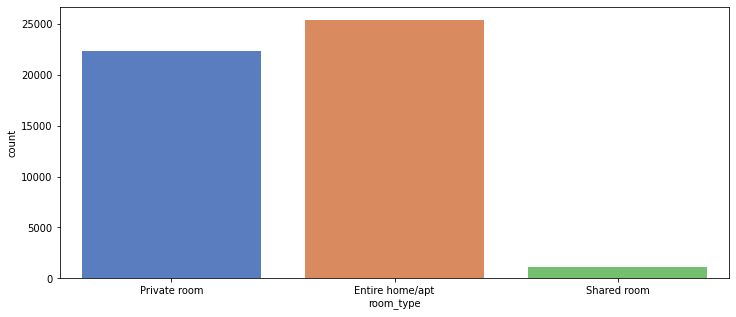

In [21]:
f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(df.room_type,palette="muted")
plt.show()

Distribución de Precios de Habitaciones Privadas
- Las habitaciones privadas en promedio tienen un precio de 60 a 120 dólares por noche en promedio, dependiendo del grupo de vecindario en el que se ubique.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


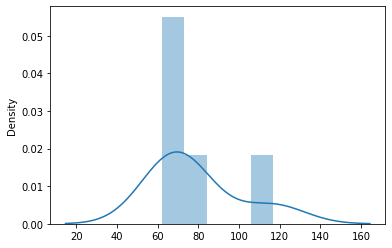

In [22]:
df1 = df[df.room_type == "Private room"][["neighbourhood_group","price"]]
d = df1.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


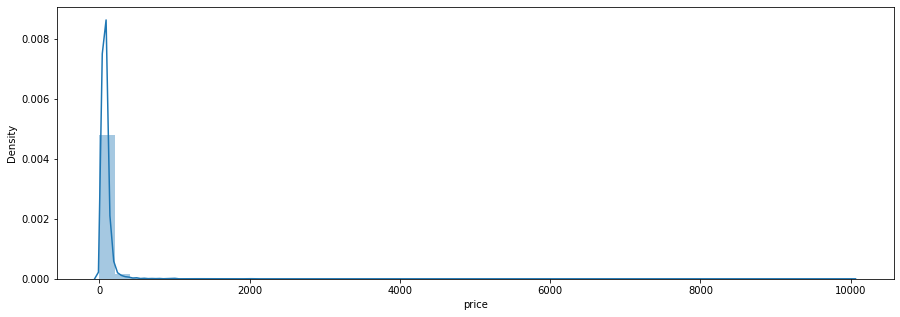

In [23]:
df1 = df[df.room_type=='Private room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

Distribución de Precios de Habitaciones Compartidas
   - La mayoría de las habitaciones compartidas tienen un rango de precios entre 50 y 70 dólares por noche dependiendo de los grupos del vecindario.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


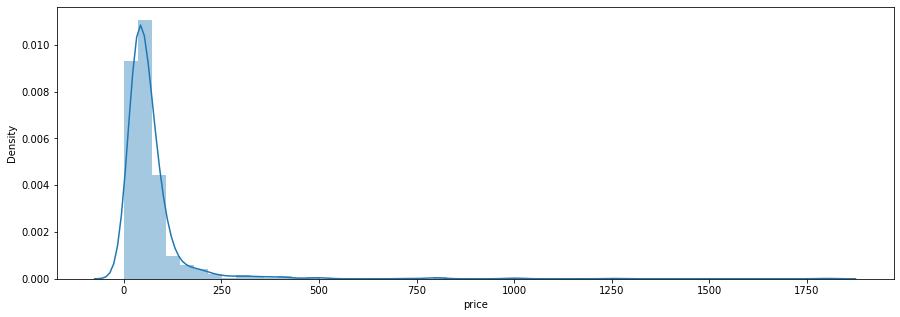

In [50]:
df1 = df[df.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

Distribución de precios de casa/apto.
- El precio promedio de una casa o apartamento completo varía de 120 a 250 dólares por noche, según el vecindario en el que se encuentre la casa.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


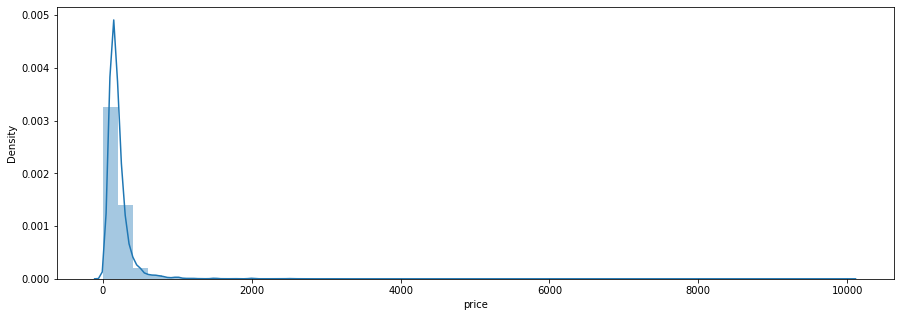

In [51]:
df1 = df[df.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

Distribución de Reseñas por mes
- La mayoría de las casas listadas en Airbnb tienen un promedio de alrededor de 1 a 10 reseñas al mes y este número puede variar a veces hasta 50.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


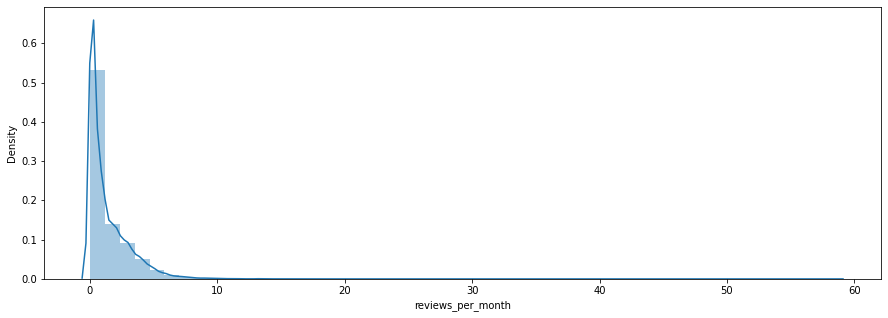

In [24]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.reviews_per_month)
plt.show()

Distribución de Disponibilidad de habitaciones
- La disponibilidad de habitaciones en diferentes grupos y barrios oscila entre 0-360.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


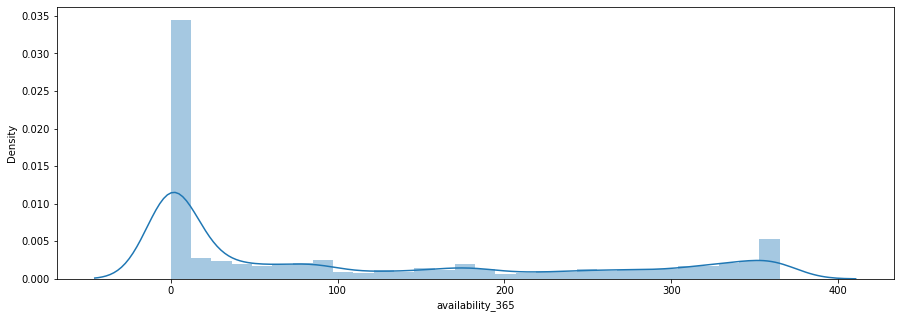

In [53]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.availability_365)
plt.show()

Mínimo de noches de estancia de personas en diferentes tipos de habitaciones
- En las habitaciones privadas, la mayoría de las personas se quedan entre 1 y 7 días, dependiendo de los grupos del vecindario.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 98.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 98.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 97.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 91.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/

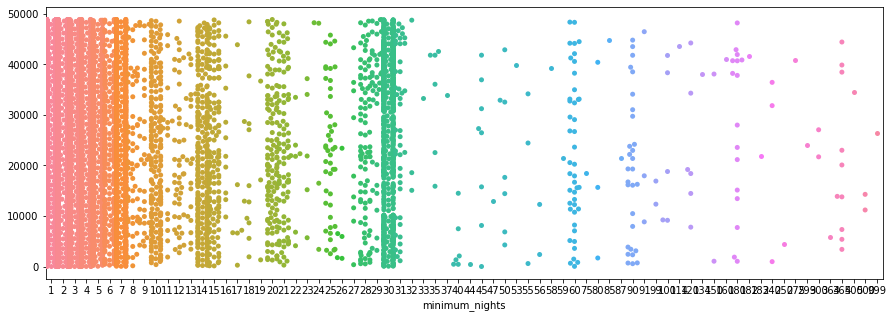

In [25]:
df1 = df[df.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

La mayoría de los viajeros, mochileros y personas de bajo presupuesto prefieren alojarse en las habitaciones compartidas. Viven en un promedio de 1-2 días mientras se mueven de un lugar a otro.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 66.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 12.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 28.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


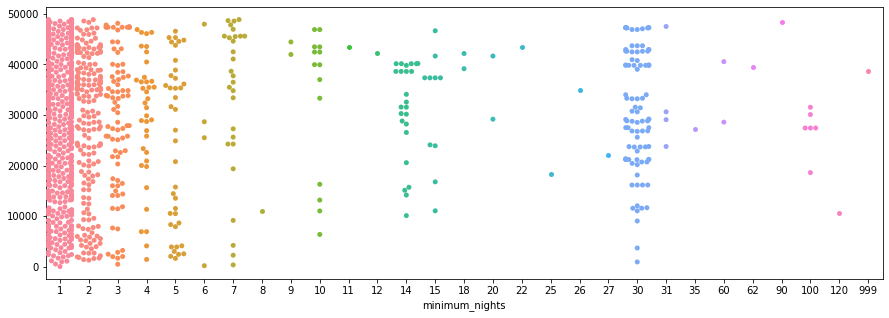

In [57]:
df1 = df[df.room_type=="Shared room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

Las personas prefieren quedarse en casa o en apartamentos, ya que hay menos restricciones cuando viajan con la familia o los amigos. Pueden preparar sus propias comidas si lo desean en estos apartamentos. En promedio, la gente vive en estos apartamentos de 1 a 90 días.

/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 98.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 98.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 98.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/versions/3.8.13/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/gitpod/.pyenv/

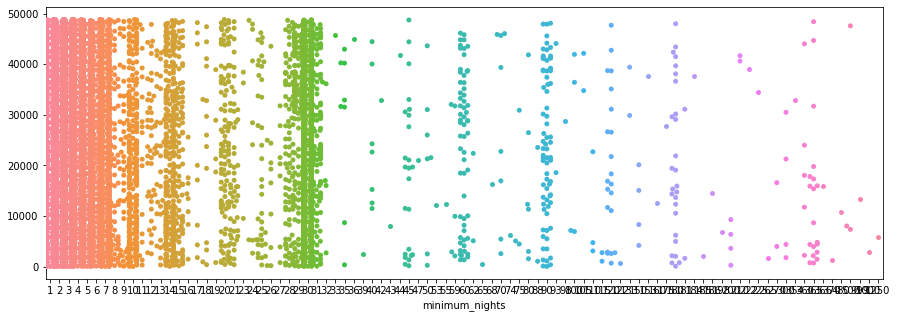

In [58]:
df1 = df[df.room_type=="Entire home/apt"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

Análisis bivariado
La descripción bivariada trata de estudiar la relación entre pares de atributos medidos simultáneamente en la misma muestra y comprende un conjunto de herramientas que se enfoca en el análisis de dos variables con el fin de determinar las relaciones empíricas entre ellas.

- Longitud vs Latitud (representando diferentes grupos de vecinos)

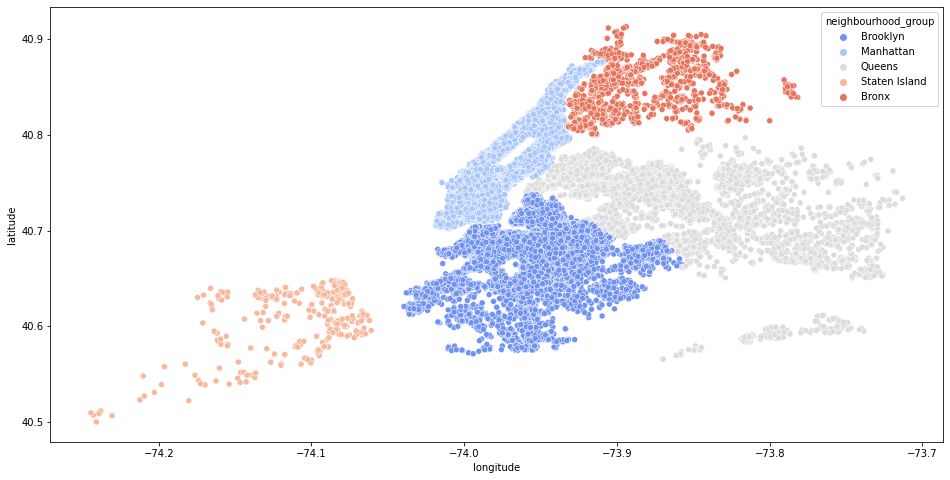

In [59]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="coolwarm")
plt.show()

Longitud vs Latitud (que representa la disponibilidad de habitaciones)
- En el gráfico podemos visualizar el número de habitaciones disponibles en diferentes grupos de barrio.

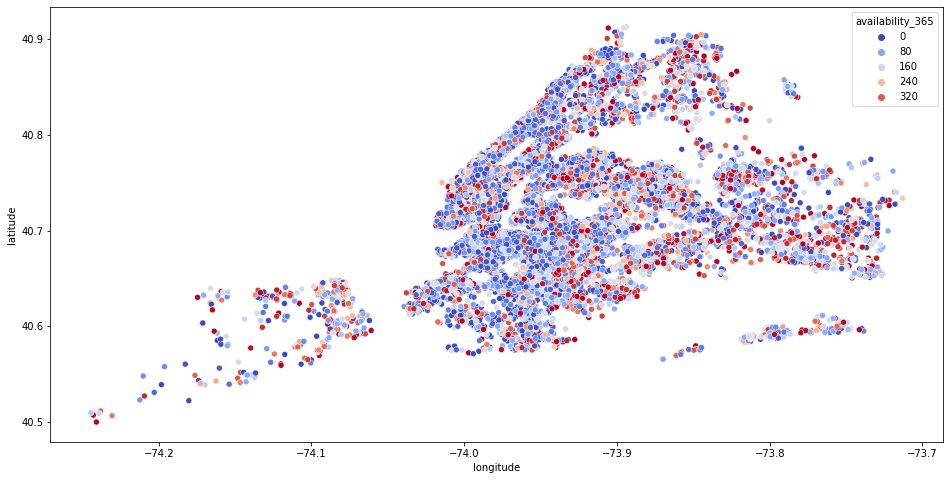

In [60]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365,palette="coolwarm")
plt.show()

Los 10 anfitriones de Airbnb más populares:
Esta es la lista de los 10 anfitriones más populares en los grupos de vecindario dados. 
Al máximo número de personas les encanta quedarse en su casa. 
La razón detrás de su popularidad puede depender del precio, el vecindario, la limpieza y muchos más.

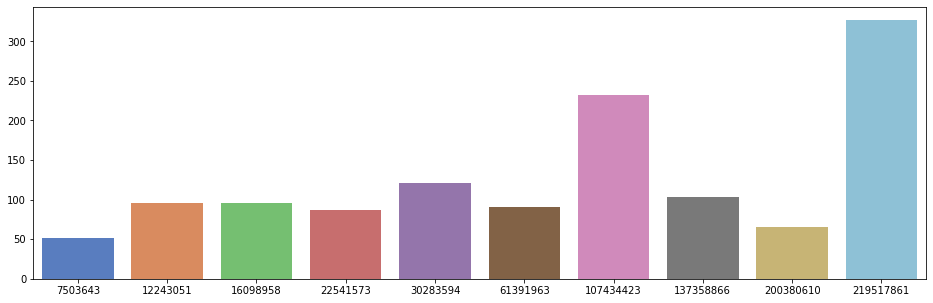

In [26]:
df1 = df.host_id.value_counts()[:10]
f,ax = plt.subplots(figsize=(16,5))
ax = sns.barplot(x = df1.index,y=df1.values,palette="muted")
plt.show()

Algunas otra pruebas de los Practicos:

In [32]:
df_airbnb = df_airbnb.astype({'name':'str','host_name':'str','neighbourhood_group':'category','neighbourhood':'category','room_type':'category'})
df_airbnb['last_review'] = pd.to_datetime(df_airbnb['last_review'], format="%Y/%m/%d")
df_airbnb.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                     category
neighbourhood                           category
latitude                                 float64
longitude                                float64
room_type                               category
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
dtype: object

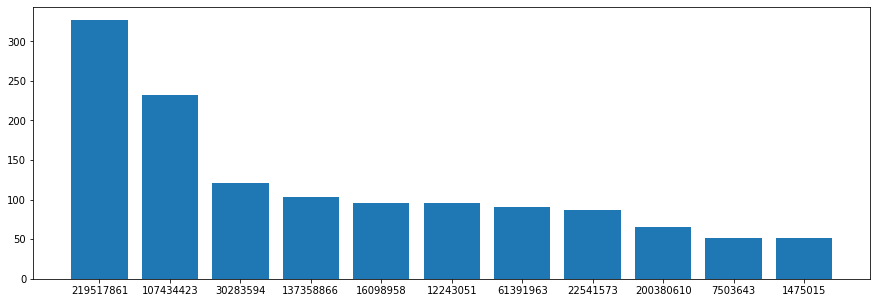

In [33]:
#determinamos que host tiene más alquileres en algunas de sus propiedades

histogramas_de_host_aux = df_airbnb['host_id'].value_counts()

histogramas_de_host = pd.DataFrame(histogramas_de_host_aux.values,columns=['frecuencia'])
histogramas_de_host['host_id'] = histogramas_de_host_aux.index

histogramas_de_host_aux2 = histogramas_de_host[histogramas_de_host['frecuencia'] > 50]

fig=plt.figure(figsize=(15,5))

plt.bar(histogramas_de_host_aux2['host_id'].astype(str), histogramas_de_host_aux2['frecuencia'] )
plt.show()

In [34]:
df_airbnb.groupby(['host_id', 'name']).size().sort_values(ascending=False)

host_id    name                                              
134184451  Hillside Hotel                                        18
417504     Loft Suite @ The Box House Hotel                      11
230192510  Artsy Private BR in Fort Greene Cumberland            10
76104209   IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS     6
27636707   WEST VILLAGE Bohemian flat in neo-Tudor town house     5
                                                                 ..
13347167   Fabulous Apartment with Soaking Tub                    1
           Fabulous Apt w/ Gorgeous Bathroom!                     1
           GORGEOUS Newly-Renovated 2-BR Flat                     1
           Gorgeous 1 Bedroom Apartment                           1
274321313  Spacious Room w/ Private Rooftop, Central location     1
Length: 48652, dtype: int64

In [35]:
df_hn=round(df_airbnb.groupby(['host_id','neighbourhood_group'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=('id','nunique'),ascending=False))[0:10] # Top 10 host
df_hn

id number_of_reviews       price
                              nunique               sum mean   mean
host_id   neighbourhood_group                                      
219517861 Manhattan             327.0              1281  4.0  253.0
107434423 Manhattan             230.0                29  0.0  303.0
30283594  Manhattan             121.0                65  1.0  278.0
12243051  Manhattan              96.0                43  0.0  213.0
16098958  Manhattan              96.0               138  1.0  209.0
61391963  Manhattan              91.0               417  5.0  146.0
22541573  Manhattan              86.0                54  1.0  216.0
137358866 Queens                 79.0                54  1.0   44.0
200380610 Manhattan              65.0                 1  0.0  290.0
1475015   Manhattan              52.0               162  3.0  103.0

In [36]:
list(df_hn.reset_index()['host_id'])
df_hn_filt=df_airbnb[df_airbnb['host_id'].isin(list(df_hn.reset_index()['host_id']))]
df_hn_filt

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1386,613556,"2 BED TriBeCa, Beautiful-Renovated!",1475015,Mike,Manhattan,Tribeca,40.71655,-74.01171,Entire home/apt,130,30,2,2015-10-31,0.03,52,116
1454,652371,ELEGANT MIDTOWN EAST STUDIO E.52 ST,1475015,Mike,Manhattan,Midtown,40.75743,-73.96939,Entire home/apt,90,30,3,2016-12-31,0.05,52,358
1455,652466,32nd St & Lexington Ave / Doorman Beautiful St...,1475015,Mike,Manhattan,Kips Bay,40.74190,-73.98160,Entire home/apt,100,30,2,2018-06-30,0.04,52,342
1456,652515,COLUMBUS CIRCLE~FULLY FURNISHED!!!,1475015,Mike,Manhattan,Hell's Kitchen,40.76758,-73.98722,Entire home/apt,85,30,2,2016-08-15,0.04,52,223
1457,652648,GRAMERCY PARK~FURNISHED E.20's ST P,1475015,Mike,Manhattan,Kips Bay,40.74189,-73.97833,Entire home/apt,87,30,3,2018-08-15,0.05,52,363
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48723,36404684,Smart Nolita 1BR w/ W/D near famous cafes by B...,107434423,Blueground,Manhattan,Nolita,40.72283,-73.99472,Entire home/apt,316,30,0,NaT,NaN,232,325
48724,36404784,Dapper Hell's Kitchen 2BR w/ Gym + W/D + Door...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76082,-73.99709,Entire home/apt,385,30,0,NaT,NaN,232,338
48725,36404815,Trendy Hell's Kitchen 1BR w/ Gym + W/D + Doorm...,107434423,Blueground,Manhattan,Hell's Kitchen,40.76083,-73.99727,Entire home/apt,267,30,0,NaT,NaN,232,228
48726,36404936,Beautiful Williamsburg 2BR w/ Skyline views + ...,107434423,Blueground,Brooklyn,Williamsburg,40.71493,-73.96365,Entire home/apt,278,30,0,NaT,NaN,232,188


In [37]:
pd.set_option('display.max_rows',110)
round(df_hn_filt.groupby(['host_id','neighbourhood_group','neighbourhood'])[['number_of_reviews','id','price']].agg({'id':pd.Series.nunique,'number_of_reviews':['sum','mean'],'price':'mean'}).sort_values(by=['host_id',('id','nunique')],ascending=False).dropna()) # Top 10 host

id number_of_reviews  \
                                                 nunique               sum   
host_id   neighbourhood_group neighbourhood                                  
219517861 Manhattan           Financial District   218.0              1129   
                              Murray Hill           50.0               141   
                              Theater District      27.0                 6   
                              Hell's Kitchen        15.0                 3   
                              Chelsea                7.0                 0   
                              Upper East Side        6.0                 2   
                              Midtown                4.0                 0   
200380610 Manhattan           Midtown               17.0                 0   
                              Upper East Side       10.0                 0   
                              Hell's Kitchen         9.0                 0   
                              Upper West Side        6.0                 0   
                              Chelsea                5.0                 1   
                              Murray Hill            5.0                 0   
                              Theater District       4.0                 0   
                              East Village           2.0                 0   
                              Gramercy               2.0                 0   
                              Kips Bay               2.0                 0   
                              West Village           2.0                 0   
                              Battery Park City      1.0                 0   
137358866 Queens              Woodside              35.0                22   
                              Sunnyside             17.0                14   
          Manhattan           Harlem                12.0                18   
          Queens              Elmhurst              10.0                11   
                              Astoria                9.0                 2   
          Brooklyn            Bushwick               6.0                 6   
          Manhattan           East Harlem            6.0                 9   
          Queens              Jackson Heights        4.0                 3   
                              Maspeth                3.0                 2   
                              Long Island City       1.0                 0   
107434423 Manhattan           Chelsea               37.0                 7   
                              Tribeca               30.0                 3   
                              Theater District      27.0                 2   
                              Financial District    25.0                 4   
                              Upper West Side       17.0                 2   
                              East Village          14.0                 1   
                              Kips Bay              14.0                 1   
                              West Village          14.0                 1   
                              Midtown               13.0                 1   
                              Hell's Kitchen        10.0                 1   
                              Upper East Side       10.0                 3   
                              Murray Hill            9.0                 2   
                              Battery Park City      2.0                 1   
                              Flatiron District      2.0                 0   
                              Nolita                 2.0                 0   
          Brooklyn            DUMBO                  1.0                 0   
                              Williamsburg           1.0                 0   
          Manhattan           Gramercy               1.0                 0   
                              Lower East Side        1.0                 0   
                              NoHo                   1.0                 0  

In [38]:
df_airbnb[['neighbourhood_group','neighbourhood']].value_counts(sort=True)[:10]

neighbourhood_group  neighbourhood     
Brooklyn             Williamsburg          3920
                     Bedford-Stuyvesant    3714
Manhattan            Harlem                2658
Brooklyn             Bushwick              2465
Manhattan            Upper West Side       1971
                     Hell's Kitchen        1958
                     East Village          1853
                     Upper East Side       1798
Brooklyn             Crown Heights         1564
Manhattan            Midtown               1545
dtype: int64

In [39]:
df_nei=df_airbnb.groupby(['neighbourhood_group','neighbourhood']).agg({'price':'mean'}).sort_values(by=['neighbourhood_group','price'],ascending=False).dropna()

In [40]:
df_nei.reset_index(inplace=True)
list(df_nei.neighbourhood_group.unique())
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].head(5))

,neighbourhood_group,neighbourhood,price
0,Staten Island,Fort Wadsworth,800.0
1,Staten Island,Woodrow,700.0
2,Staten Island,Prince's Bay,409.5
3,Staten Island,Randall Manor,336.0
4,Staten Island,Willowbrook,249.0


,neighbourhood_group,neighbourhood,price
43,Queens,Neponsit,274.666667
44,Queens,Breezy Point,213.333333
45,Queens,Jamaica Estates,182.947368
46,Queens,Arverne,171.779221
47,Queens,Belle Harbor,171.500000


,neighbourhood_group,neighbourhood,price
94,Manhattan,Tribeca,490.638418
95,Manhattan,Battery Park City,367.557143
96,Manhattan,Flatiron District,341.925000
97,Manhattan,NoHo,295.717949
98,Manhattan,SoHo,287.103352


,neighbourhood_group,neighbourhood,price
126,Brooklyn,Sea Gate,487.857143
127,Brooklyn,Cobble Hill,211.929293
128,Brooklyn,Brooklyn Heights,209.064935
129,Brooklyn,DUMBO,196.305556
130,Brooklyn,Vinegar Hill,187.176471


,neighbourhood_group,neighbourhood,price
173,Bronx,Riverdale,442.090909
174,Bronx,City Island,173.000000
175,Bronx,Spuyten Duyvil,154.750000
176,Bronx,Eastchester,141.692308
177,Bronx,Unionport,137.142857


In [41]:
for barrio in list(df_nei.neighbourhood_group.unique()) :
    display(df_nei[df_nei['neighbourhood_group'] == barrio].tail(5))

,neighbourhood_group,neighbourhood,price
38,Staten Island,Concord,58.192308
39,Staten Island,Grant City,57.666667
40,Staten Island,New Dorp Beach,57.400000
41,Staten Island,New Dorp,57.000000
42,Staten Island,Bull's Head,47.333333


,neighbourhood_group,neighbourhood,price
89,Queens,Ridgewood,77.184397
90,Queens,Rosedale,76.694915
91,Queens,Little Neck,75.200000
92,Queens,Woodhaven,67.170455
93,Queens,Corona,59.171875


,neighbourhood_group,neighbourhood,price
121,Manhattan,Morningside Heights,114.783237
122,Manhattan,Roosevelt Island,113.259740
123,Manhattan,Washington Heights,89.610679
124,Manhattan,Marble Hill,89.166667
125,Manhattan,Inwood,88.896825


,neighbourhood_group,neighbourhood,price
168,Brooklyn,Midwood,80.339450
169,Brooklyn,Gravesend,79.014706
170,Brooklyn,Brownsville,76.459016
171,Brooklyn,Bensonhurst,75.786667
172,Brooklyn,Borough Park,63.066176


,neighbourhood_group,neighbourhood,price
216,Bronx,Mount Eden,58.500000
217,Bronx,Bronxdale,57.105263
218,Bronx,Soundview,53.466667
219,Bronx,Tremont,51.545455
220,Bronx,Hunts Point,50.500000


Step 3:

Now that you have a beautiful EDA notebook, and you have a better knowledge of the data, let's imagine Airbnb asks you to deliver a machine learning pipeline that cleans the data, in order to give it to their modeling area for future price prediction.

Use the app.py to create your cleaning pipeline that makes data ready for modeling. Save your clean data in the 'Processed' data folder.

We used to add our .env file into the .gitignore file in order to hide our passwords and credentials from version control.